# Hypothesis Generation
1) A person's occupation can be a determining factor.

2) A person's age can be determining factor. People above certain age do not generally have a stable source of income.

3) Net worth can be a determining factor,people with lower net worth likely to churn.

4) If a person has a history of churn, he/she is likely to churn again.

5) The transactions with the bank can also determine the people likely to churn

# Loading the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('churn_prediction.csv')
df.shape

(28382, 21)

In [3]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


 Data Exploration

In [4]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [5]:
df.describe(include='all')

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,27857,25919.000000,28302,27579.000000,28382.000000,28382.000000,25159.000000,...,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
unique,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Male,NaN,self_employed,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,16548,NaN,17476,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15143.508667,2364.336446,48.208336,NaN,0.347236,NaN,796.109576,2.225530,925.975019,69.997814,...,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,NaN,0.997661,NaN,432.872102,0.660443,937.799129,86.341098,...,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,NaN,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,...,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,NaN,0.000000,NaN,409.000000,2.000000,176.000000,11.000000,...,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,NaN,0.000000,NaN,834.000000,2.000000,572.000000,30.000000,...,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,NaN,0.000000,NaN,1096.000000,3.000000,1440.000000,95.000000,...,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000


Isnull function


In [6]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

Data Types

In [7]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [8]:
temp = pd.DataFrame(index=df.columns)
temp['data_type'] = df.dtypes
temp['null_count'] = df.isnull().sum()
temp['unique_count'] = df.nunique()
temp

,data_type,null_count,unique_count
customer_id,int64,0,28382
vintage,int64,0,5473
age,int64,0,90
gender,object,525,2
dependents,float64,2463,15
occupation,object,80,5
city,float64,803,1604
customer_nw_category,int64,0,3
branch_code,int64,0,3185
days_since_last_transaction,float64,3223,360


# Univariate Analysis

In [9]:
df['churn'].value_counts()

0    23122
1     5260
Name: churn, dtype: int64

In [10]:
df['churn'].value_counts()/len(df)*100

0    81.467127
1    18.532873
Name: churn, dtype: float64

18% people churn

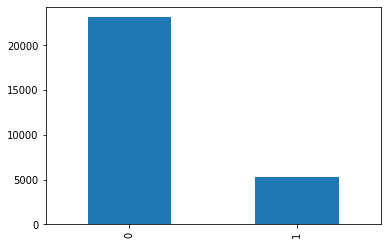

In [11]:
df['churn'].value_counts().plot.bar()

So, 5620 users out of total 28382 have churned which is around 18.5%. Let's now explore the variables to have a better understanding of the dataset. We will first explore the variables individually using univariate analysis, then we will look at the relation between various independent variables and the target variable. We will also look at the correlation plot to see which variables affects the target variable most.



In [12]:
df['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [13]:
df['gender'].value_counts()/len(df)*100

Male      58.304559
Female    39.845677
Name: gender, dtype: float64

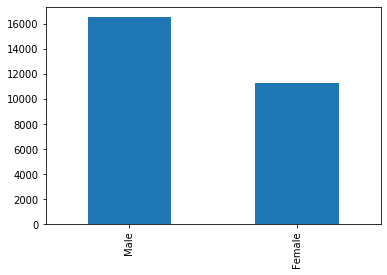

In [14]:
df['gender'].value_counts().plot.bar()


In [15]:
df['customer_nw_category'].value_counts()

2    14559
3    10112
1     3711
Name: customer_nw_category, dtype: int64

In [16]:
df['customer_nw_category'].value_counts()/len(df)*100

2    51.296596
3    35.628215
1    13.075188
Name: customer_nw_category, dtype: float64

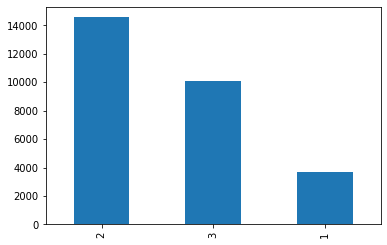

In [17]:
df['customer_nw_category'].value_counts().plot.bar()

In [18]:
df['occupation'].value_counts()/len(df)*100


self_employed    61.574237
salaried         23.620605
student           7.251075
retired           7.131280
company           0.140934
Name: occupation, dtype: float64

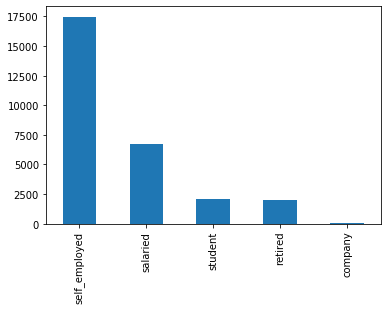

In [19]:
df['occupation'].value_counts().plot.bar()

In [20]:
df['dependents'].value_counts()/len(df)*100

0.0     75.523219
2.0      7.575224
1.0      4.915087
3.0      2.469875
4.0      0.630681
5.0      0.144458
6.0      0.028187
7.0      0.010570
36.0     0.003523
52.0     0.003523
25.0     0.003523
9.0      0.003523
50.0     0.003523
32.0     0.003523
8.0      0.003523
Name: dependents, dtype: float64

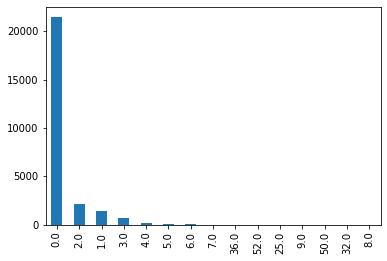

In [21]:
df['dependents'].value_counts().plot(kind='bar')

Values above 4 seem like outliers

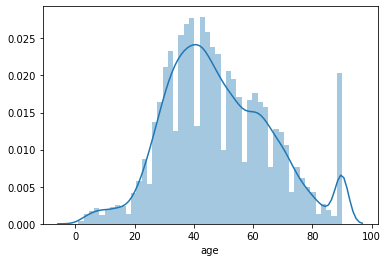

In [22]:
import seaborn as sn                   
sn.distplot(df["age"])

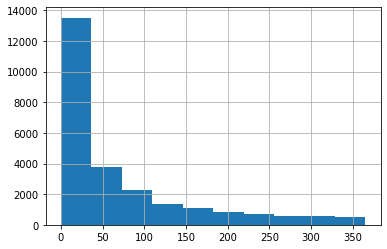

In [23]:
df["days_since_last_transaction"].hist()

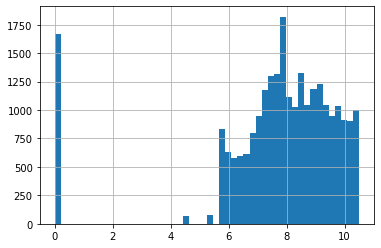

In [24]:
log_days_since_last_transaction = np.log((df['days_since_last_transaction']*100)+1)
log_days_since_last_transaction.hist(bins=50)

In [25]:
df['log_days_since_last_transaction']=log_days_since_last_transaction

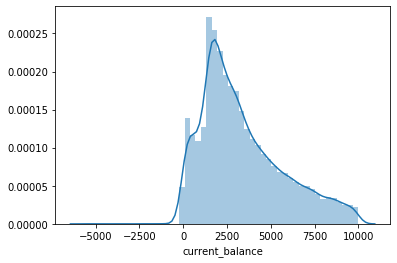

In [26]:
sn.distplot(df["current_balance"].loc[df['current_balance']<10000])

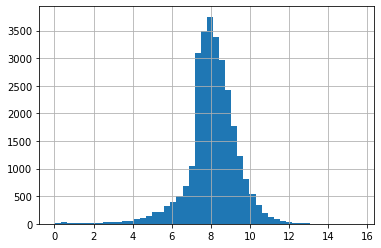

In [27]:
bal = df['current_balance']
log_current_balance = np.log(bal+1)
log_current_balance.hist(bins=50)

In [28]:
df['log_current_balance']=log_current_balance

Text(0.5, 0, 'Previous Month End Balance')

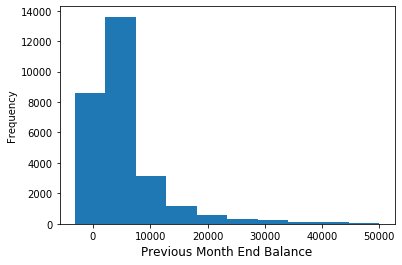

In [29]:
(df['previous_month_end_balance'].loc[df['previous_month_end_balance']<50000]).plot.hist()
plt.xlabel('Previous Month End Balance', fontsize=12)

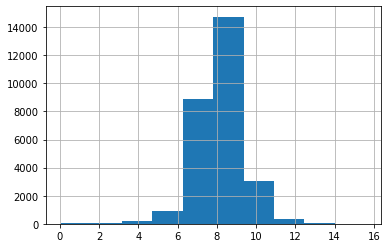

In [30]:
log_previous_month_end_balance = np.log((df['previous_month_end_balance'])+1)
log_previous_month_end_balance.hist()

In [31]:
df['log_previous_month_end_balance']=log_previous_month_end_balance

Text(0.5, 0, 'Average Monthly Balance prevQ')

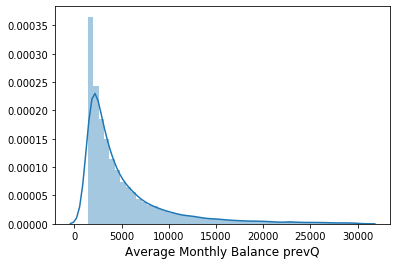

In [32]:
sn.distplot(df['average_monthly_balance_prevQ'].loc[df['average_monthly_balance_prevQ']<30000])
plt.xlabel('Average Monthly Balance prevQ', fontsize=12)

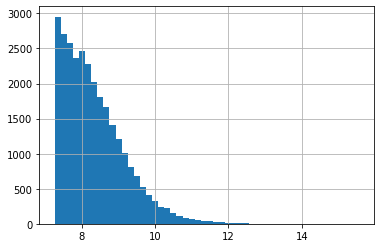

In [33]:
log_average_monthly_balance_prevQ = np.log((df.average_monthly_balance_prevQ)+1)
log_average_monthly_balance_prevQ.hist(bins=50)

In [34]:
df['log_average_monthly_balance_prevQ']=log_average_monthly_balance_prevQ

Text(0.5, 0, 'Average Monthly Balance prevQ2')

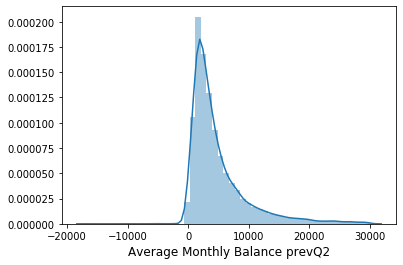

In [35]:
sn.distplot(df['average_monthly_balance_prevQ2'].loc[df['average_monthly_balance_prevQ2']<30000])
plt.xlabel('Average Monthly Balance prevQ2', fontsize=12)

Text(0.5, 0, 'Current Month Credit')

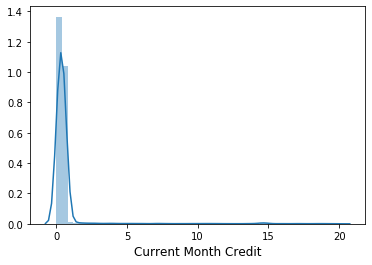

In [36]:
sn.distplot(df['current_month_credit'].loc[df['current_month_credit']<20])
plt.xlabel('Current Month Credit', fontsize=12)

Text(0.5, 0, 'Previous Month Credit')

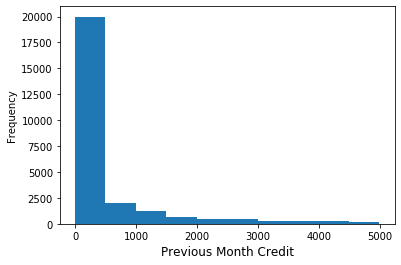

In [37]:
(df['previous_month_credit'].loc[df['previous_month_credit']<5000]).plot.hist()
plt.xlabel('Previous Month Credit', fontsize=12)

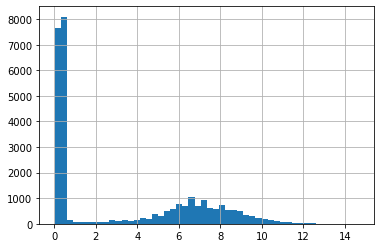

In [38]:
log_previous_month_credit = np.log((df.previous_month_credit)+1)
log_previous_month_credit.hist(bins=50)

In [39]:
df['log_previous_month_credit']=log_previous_month_credit

Text(0.5, 0, 'Current Month Debit')

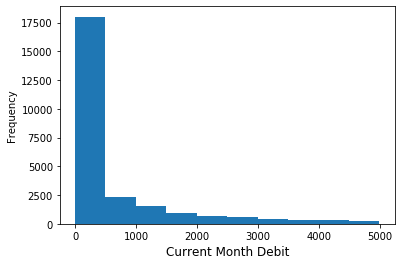

In [40]:
(df['current_month_debit'].loc[df['current_month_debit']<5000]).plot.hist()
plt.xlabel('Current Month Debit', fontsize=12)

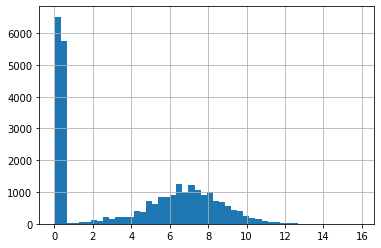

In [41]:
log_current_month_debit = np.log((df.current_month_debit)+1)
log_current_month_debit.hist(bins=50)

In [42]:
df['log_current_month_debit']=log_current_month_debit

Text(0.5, 0, 'Previous Month Debit')

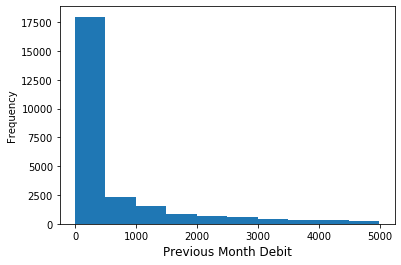

In [43]:
(df['previous_month_debit'].loc[df['previous_month_debit']<5000]).plot.hist()
plt.xlabel('Previous Month Debit', fontsize=12)

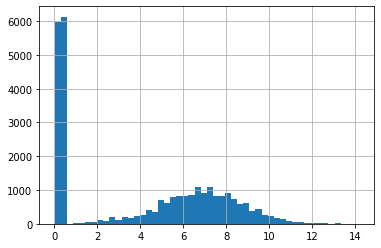

In [44]:
log_previous_month_debit = np.log((df.previous_month_debit)+1)
log_previous_month_debit.hist(bins=50)

In [45]:
df['log_previous_month_debit']=log_previous_month_debit

Text(0.5, 0, 'Current Month Balance')

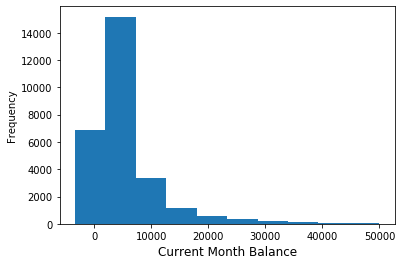

In [46]:
(df['current_month_balance'].loc[df['current_month_balance']<50000]).plot.hist()
plt.xlabel('Current Month Balance', fontsize=12)

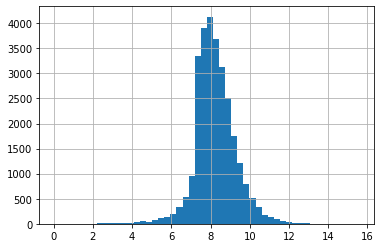

In [47]:
log_current_month_balance = np.log((df.current_month_balance)+1)
log_current_month_balance.hist(bins=50)

In [48]:
df['log_current_month_balance']=log_current_month_balance

Text(0.5, 0, 'Previous Month Balance')

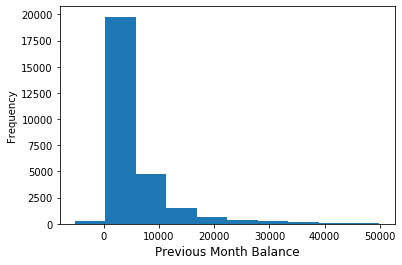

In [49]:
(df['previous_month_balance'].loc[df['previous_month_balance']<50000]).plot.hist()
plt.xlabel('Previous Month Balance', fontsize=12)

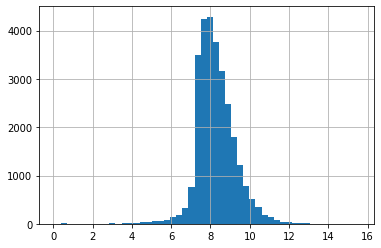

In [50]:
log_previous_month_balance = np.log((df.previous_month_balance)+1)
log_previous_month_balance.hist(bins=50)

In [51]:
df['log_previous_month_balance']=log_previous_month_balance

In [52]:
df.shape


(28382, 30)

# Outliers and Missing Value Treatment

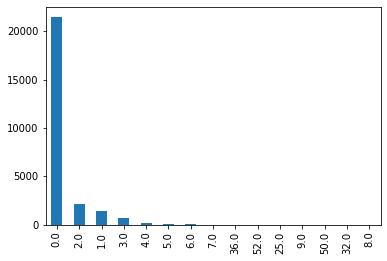

In [53]:
df['dependents'].value_counts().plot(kind='bar')

Most people don't have more than more dependents so we treat values above 4 as outliers

In [54]:
df['dependents'].mode()

0    0.0
dtype: float64

In [55]:
for i in range(0,len(df)):
    if df['dependents'][i] > 4:
        df['dependents'][i]=0.0

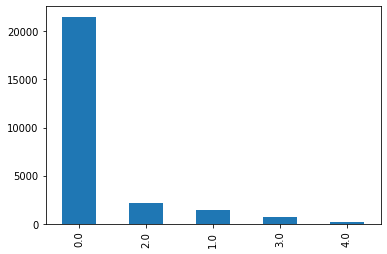

In [56]:
df['dependents'].value_counts().plot(kind='bar')

In [57]:
df.drop_duplicates().shape

(28382, 30)

In [58]:
df.shape

(28382, 30)

 We have no duplicates. Hence the shape did not change here.

In [59]:
df.isnull().sum()

customer_id                             0
vintage                                 0
age                                     0
gender                                525
dependents                           2463
occupation                             80
city                                  803
customer_nw_category                    0
branch_code                             0
days_since_last_transaction          3223
current_balance                         0
previous_month_end_balance              0
average_monthly_balance_prevQ           0
average_monthly_balance_prevQ2          0
current_month_credit                    0
previous_month_credit                   0
current_month_debit                     0
previous_month_debit                    0
current_month_balance                   0
previous_month_balance                  0
churn                                   0
log_days_since_last_transaction      3223
log_current_balance                    17
log_previous_month_end_balance    

In [60]:
df['gender'].fillna(value = (df['gender'].mode()[0]), inplace=True)

In [61]:
df['occupation'].mode()

0    self_employed
dtype: object

In [62]:
df['occupation'].fillna(value = (df['occupation'].mode()[0]), inplace=True)

In [63]:
pd.crosstab(df['dependents'],df['gender'])

gender,Female,Male
dependents,,
0.0,9475,12019
1.0,346,1049
2.0,324,1826
3.0,56,645
4.0,18,161


Majority females do not have more than 4 dependents

In [64]:
pd.crosstab(df.dependents,[df.gender,df.occupation])

gender      Female                                           Male          \
occupation company retired salaried self_employed student company retired   
dependents                                                                  
0.0              5     349     1554          6693     874      26    1414   
1.0              0       8       82           250       6       1      57   
2.0              0       9       67           247       1       2      56   
3.0              0       0       11            45       0       1      10   
4.0              0       0        4            14       0       0       7   

gender                                     
occupation salaried self_employed student  
dependents                                 
0.0            3507          6177     895  
1.0             379           604       8  
2.0             514          1247       7  
3.0             211           423       0  
4.0              36           118       0

We consider students,company and retired do not have dependents,self employed have 2 dependents,salaried females have 1 dependent and salaried males have 2 dependents

In [65]:
for i in range(0, len(df)):
    if pd.isnull(df['dependents'][i])==True:
        if df['occupation'][i] == 'student'or df['occupation'][i]=='company'or df['occupation'][i]=='retired':
            df['dependents'][i] = 0.0
        elif df['occupation'][i]=='self_employed':
            df['dependents'][i]=2.0
        elif df['occupation'][i]=='salaried' and df['gender'][i]=='male':
            df['dependents'][i]=2.0
        else: 
            df['dependents'][i] = 1.0


In [66]:
df['city'].mode()

0    1020.0
dtype: float64

In [67]:
df['city'].fillna(value = (df['city'].mode()[0]), inplace=True)

In [68]:
df['days_since_last_transaction'].mode()

0    0.0
dtype: float64

In [69]:
p=df['days_since_last_transaction'].median()
q=df['log_days_since_last_transaction'].median()

In [70]:
df['days_since_last_transaction'].mean()

69.99781390357327

In [71]:
df['days_since_last_transaction'].fillna(value=(p),inplace=True)
df['log_days_since_last_transaction'].fillna(value=(q),inplace=True)
df['log_current_balance'].fillna(value=(df['log_current_balance'].median()),inplace=True)
df['log_previous_month_end_balance'].fillna(value=(df['log_previous_month_end_balance'].median()),inplace=True)
df['log_previous_month_balance'].fillna(value=(df['log_previous_month_balance'].median()),inplace=True)
df['log_current_month_balance'].fillna(value=(df['log_current_month_balance'].median()),inplace=True)


In [72]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                           0
occupation                           0
city                                 0
customer_nw_category                 0
branch_code                          0
days_since_last_transaction          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
log_days_since_last_transaction      0
log_current_balance                  0
log_previous_month_end_balance       0
log_average_monthly_balance_prevQ    0
log_previous_month_credit

# Data Type

In [73]:
df.dtypes

customer_id                            int64
vintage                                int64
age                                    int64
gender                                object
dependents                           float64
occupation                            object
city                                 float64
customer_nw_category                   int64
branch_code                            int64
days_since_last_transaction          float64
current_balance                      float64
previous_month_end_balance           float64
average_monthly_balance_prevQ        float64
average_monthly_balance_prevQ2       float64
current_month_credit                 float64
previous_month_credit                float64
current_month_debit                  float64
previous_month_debit                 float64
current_month_balance                float64
previous_month_balance               float64
churn                                  int64
log_days_since_last_transaction      float64
log_curren

In [74]:
df = df.astype({'dependents': 'object', 'customer_nw_category': 'object'})

# Bivariate Analysis


In [75]:
pd.crosstab(df['occupation'],df['churn'])

churn,0,1
occupation,,
company,36,4
retired,1719,305
salaried,5557,1147
self_employed,14076,3480
student,1734,324


In [76]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df['occupation'],df['churn']))

(56.95008997367705,
 1.2673587479192002e-11,
 4,
 array([[3.25868508e+01, 7.41314918e+00],
        [1.64889465e+03, 3.75105348e+02],
        [5.46155620e+03, 1.24244380e+03],
        [1.43023688e+04, 3.25363117e+03],
        [1.67659347e+03, 3.81406525e+02]]))

Since the p value is less than 0.05 we can say the result is statistically different

In [77]:
pd.crosstab(df['gender'],df['churn'])

churn,0,1
gender,,
Female,9324,1985
Male,13798,3275


In [78]:
chi2_contingency(pd.crosstab(df['gender'],df['churn']))

(11.862741137017077,
 0.0005726818953372832,
 1,
 array([[ 9213.11739835,  2095.88260165],
        [13908.88260165,  3164.11739835]]))

Since the p value is less than 0.05 we can say the result is statistically different, males are likely to churn more than females

In [79]:
pd.crosstab(df['customer_nw_category'],df['churn'])

churn,0,1
customer_nw_category,,
1,3001,710
2,11953,2606
3,8168,1944


In [80]:
chi2_contingency(pd.crosstab(df['customer_nw_category'],df['churn']))

(7.955973344599787,
 0.01872329754944543,
 2,
 array([[ 3023.24508491,   687.75491509],
        [11860.79902755,  2698.20097245],
        [ 8237.95588753,  1874.04411247]]))

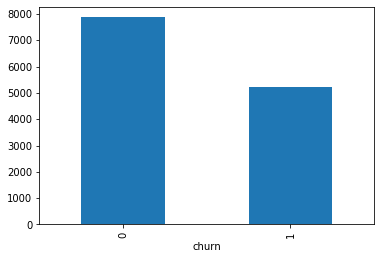

In [81]:
df.groupby('churn')['current_balance'].mean().plot.bar()

People who churn have current balance less than 5000

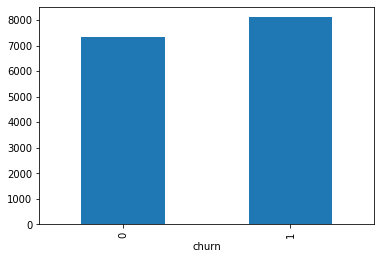

In [82]:
df.groupby('churn')['previous_month_end_balance'].mean().plot.bar()

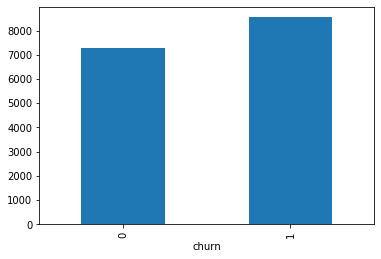

In [83]:
df.groupby('churn')['average_monthly_balance_prevQ'].mean().plot.bar()

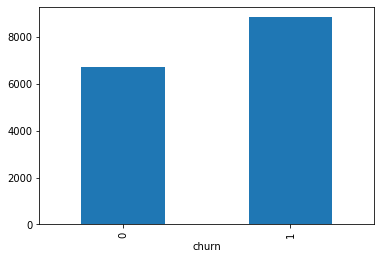

In [84]:
df.groupby('churn')['average_monthly_balance_prevQ2'].mean().plot.bar()

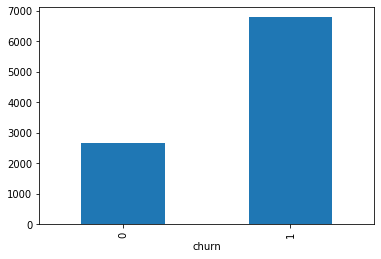

In [85]:
df.groupby('churn')['current_month_credit'].mean().plot.bar()

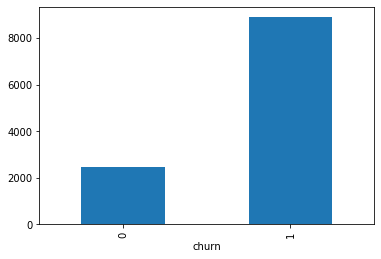

In [86]:
df.groupby('churn')['current_month_debit'].mean().plot.bar()

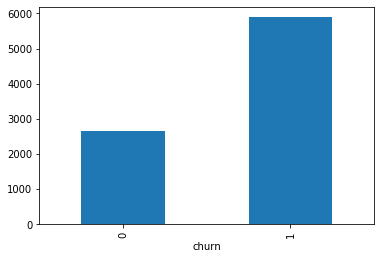

In [87]:
df.groupby('churn')['previous_month_credit'].mean().plot.bar()

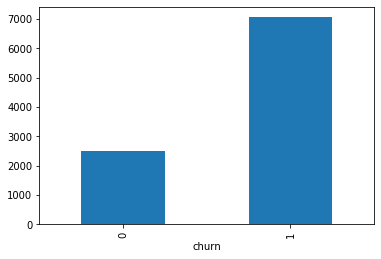

In [88]:
df.groupby('churn')['previous_month_debit'].mean().plot.bar()

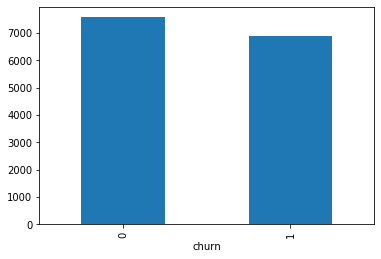

In [89]:
df.groupby('churn')['current_month_balance'].mean().plot.bar()

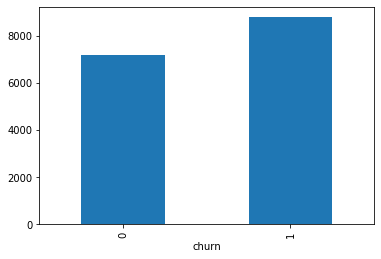

In [90]:
df.groupby('churn')['previous_month_balance'].mean().plot.bar()

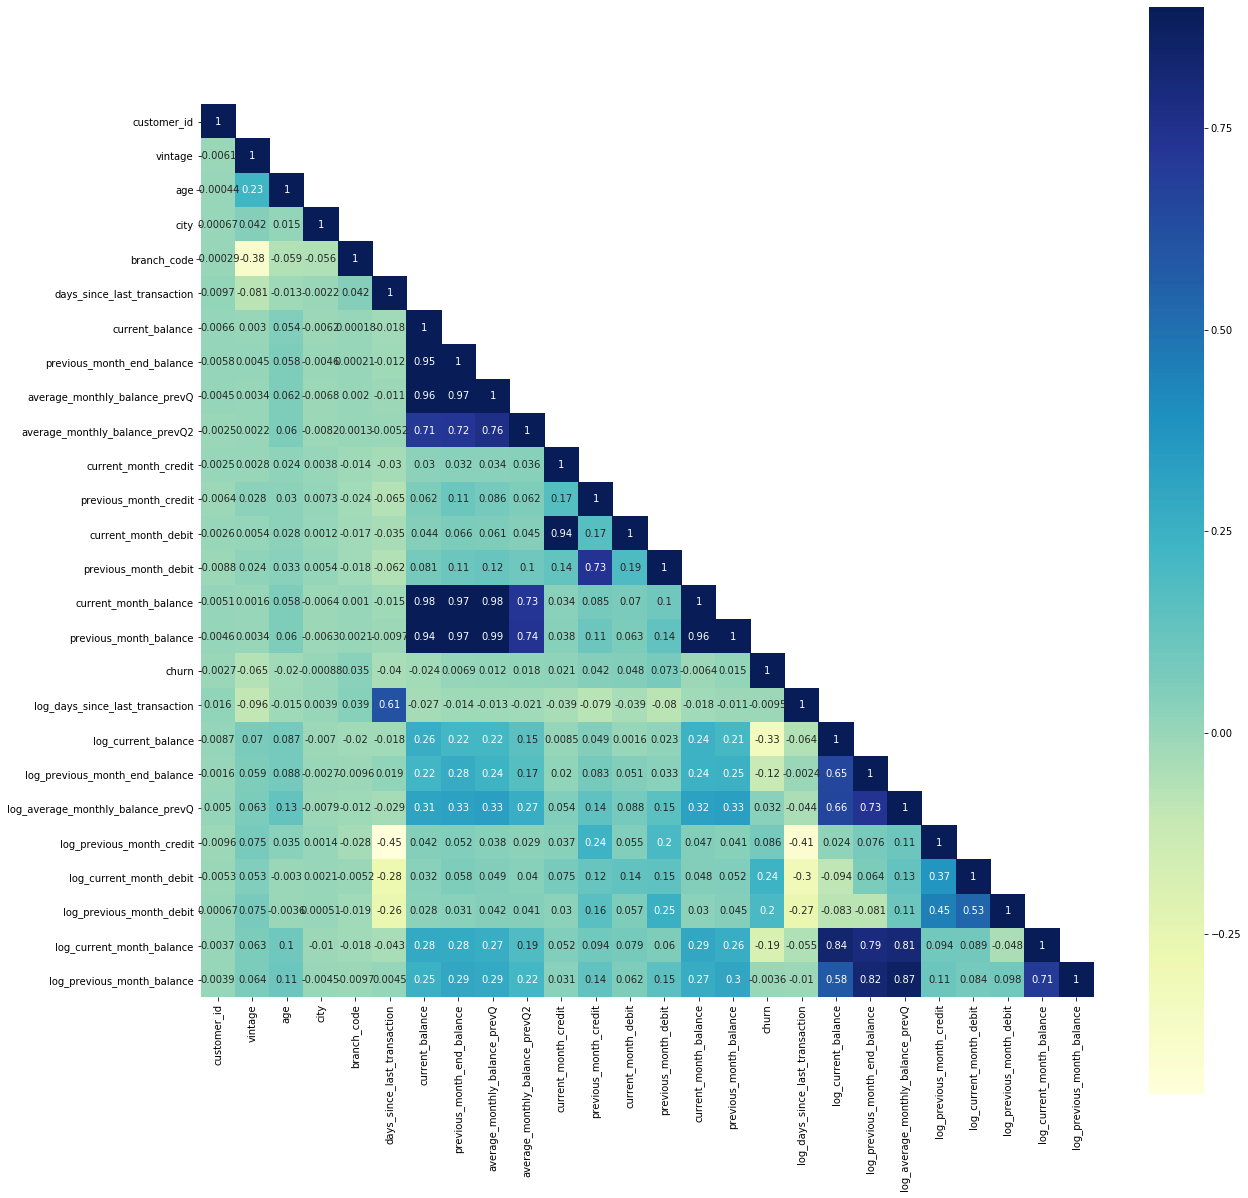

In [91]:
corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,20)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

churn is not strongly correlated to any of the parameters

# Classification Benchmark

### Shuffling and Creating Train and Test Set

In [92]:
from sklearn.utils import shuffle

data = shuffle(df, random_state = 42)

div = int(data.shape[0]/4)

train = data.loc[:3*div+1,:]
test = data.loc[3*div+1:]

train.shape, test.shape

((17246, 30), (11137, 30))

In [93]:
train.head()


,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,churn,log_days_since_last_transaction,log_current_balance,log_previous_month_end_balance,log_average_monthly_balance_prevQ,log_previous_month_credit,log_current_month_debit,log_previous_month_debit,log_current_month_balance,log_previous_month_balance
27546,29404,4224,53,Female,3,self_employed,146.0,2,2841,118.0,...,0,9.375940,4.649761,7.424159,7.514255,0.364643,7.265437,8.517481,5.470462,7.182762
16516,17629,718,30,Female,1,salaried,334.0,2,750,30.0,...,1,8.006701,4.356324,4.356324,7.334453,0.530628,0.530628,7.922566,4.356324,7.582576
11680,12476,2803,32,Female,0,salaried,980.0,2,655,17.0,...,1,7.438972,7.294785,7.556538,7.470355,4.115290,6.186990,6.578390,7.449550,7.668907
20270,21629,2113,67,Male,0,retired,666.0,2,715,20.0,...,0,7.601402,8.009376,8.011683,7.981494,5.372636,3.789629,5.687958,8.016621,8.030296
9185,9796,1434,45,Male,0,self_employed,1096.0,2,933,7.0,...,0,6.552508,8.735245,8.839943,9.035246,8.420464,6.672235,9.093695,8.736526,9.144525


In [94]:
test.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,churn,log_days_since_last_transaction,log_current_balance,log_previous_month_end_balance,log_average_monthly_balance_prevQ,log_previous_month_credit,log_current_month_debit,log_previous_month_debit,log_current_month_balance,log_previous_month_balance
21286,22707,2020,46,Female,0,self_employed,1020.0,3,282,240.0,...,1,10.085851,6.533643,7.472688,7.304381,0.058269,6.977738,0.058269,6.771512,7.472688
8000,8524,2056,41,Female,0,self_employed,834.0,3,8,23.0,...,0,7.741099,6.376846,5.794019,8.966382,8.378255,8.300864,9.605015,6.916943,9.379978
16059,17135,318,62,Male,0,self_employed,407.0,2,239,14.0,...,0,7.244942,9.140385,9.213769,9.213252,6.677172,6.193956,6.366591,9.170996,9.181794
73,77,1390,61,Male,0,salaried,318.0,3,2760,25.0,...,0,7.824446,7.887287,7.860100,7.824578,5.215696,4.290870,0.470004,7.902887,7.854121
1843,1976,628,44,Female,2,self_employed,721.0,3,894,13.0,...,0,7.170888,8.594280,8.034761,7.807482,7.360403,0.039221,0.039221,8.341594,7.418805


 ## Simple Mode

In [95]:
test['simple_mode'] = train['churn'].mode()[0]
test['simple_mode'].head()

21286    0
8000     0
16059    0
73       0
1843     0
Name: simple_mode, dtype: int64

In [96]:
from sklearn.metrics import accuracy_score
simple_mode_accuracy = accuracy_score(test['churn'], test['simple_mode'])
simple_mode_accuracy

0.8067702253748765

## Mode Based on Gender

In [97]:
gender_mode = pd.crosstab(train['churn'],train['gender'])
gender_mode

gender,Female,Male
churn,,
0,5642,8495
1,1170,1939


In [98]:
test['gender_mode'] = test['churn']

for i in test['gender'].unique():
    test['gender_mode'][test['gender'] == str(i)] = train['churn'][train['gender'] == str(i)].mode()[0]

In [99]:
gender_accuracy = accuracy_score(test['churn'], test['gender_mode'])
gender_accuracy

0.8067702253748765

## Mode Based on Occuaption

In [100]:
occupation_mode = pd.crosstab(train['churn'],train['occupation'])
occupation_mode

occupation,company,retired,salaried,self_employed,student
churn,,,,,
0,24,1028,3367,8663,1055
1,2,170,691,2044,202


In [101]:
test['occupation_mode'] = test['churn']

for i in test['occupation'].unique():
    test['occupation_mode'][test['occupation'] == str(i)] = train['churn'][train['occupation'] == str(i)].mode()[0]

In [102]:
occupation_accuracy = accuracy_score(test['churn'], test['occupation_mode'])
occupation_accuracy

0.8067702253748765

# KNN Classification with K fold cross validation

In [109]:
df1=pd.read_csv('cleaned_churn_prediction.csv')
df1.shape


(28382, 28)

In [110]:
df1 = shuffle(df1, random_state = 52)
df1.columns

Index(['age', 'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'gender_Female', 'gender_Male', 'dependents_0.0', 'dependents_1.0',
       'dependents_2.0', 'dependents_3.0', 'dependents_4.0',
       'occupation_company', 'occupation_retired', 'occupation_salaried',
       'occupation_self_employed', 'occupation_student',
       'customer_nw_category_1', 'customer_nw_category_2',
       'customer_nw_category_3'],
      dtype='object')

In [111]:
df1.head()

,age,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,...,dependents_3.0,dependents_4.0,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_1,customer_nw_category_2,customer_nw_category_3
7077,48,76,5780.28,5969.94,6435.06,7152.38,0.56,0.56,0.56,0.56,...,0,0,0,0,0,1,0,0,1,0
8589,40,205,10091.73,11076.43,11117.89,10643.32,0.09,0.09,1534.79,290.93,...,0,0,0,0,0,1,0,0,1,0
1376,41,0,389.24,3936.52,4441.83,9665.23,50244.77,2911.91,27318.87,25620.41,...,0,0,0,0,0,1,0,0,1,0
20371,10,0,3116.54,3211.40,3061.70,4637.43,220.04,214.90,414.90,0.61,...,0,0,0,0,0,0,1,0,1,0
26182,33,136,1435.52,1435.52,1877.24,2088.66,0.07,0.07,0.07,354.04,...,0,0,0,0,0,1,0,0,0,1


In [112]:
x = df1.drop(['churn'], axis=1)
y = df1['churn']
x.shape, y.shape

((28382, 27), (28382,))

### Checking Consistency , using Cross Validation

In [113]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [114]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x, y, random_state = 96, stratify=y)

In [115]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score


### Automating the process of cross validation for different K-Neighbors

In [116]:
def Val_score(n_neighbors):
    '''
  takes range of n_neighbors as input
  returns Mean and Standard Deviation for each value of n_neighbors
  '''
    avg = []
    std = []
  
    for i in n_neighbors:
    
    # 10 fold cross validation for every value of n_neighbor
      score = cross_val_score( KNN(n_neighbors = i) , X = train_x, y = train_y, cv = 10)
    
    # adding mean to avg list
      avg.append(score.mean())
    
    # adding standard deviation to std list
      std.append(score.std())
    
    return avg, std

In [117]:
n_neighbors = range(1,40)
mean, std = Val_score(n_neighbors)

### Ploting Mean Validation Score for each K 

Text(0.5, 1.0, 'Mean Validation score')

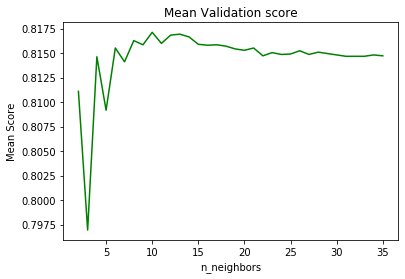

In [118]:
plt.plot(n_neighbors[1:35], mean[1:35], color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

### Ploting Standard Deaviation Validation Score for each K value


Text(0.5, 1.0, 'Standard Deviation of Validation score')

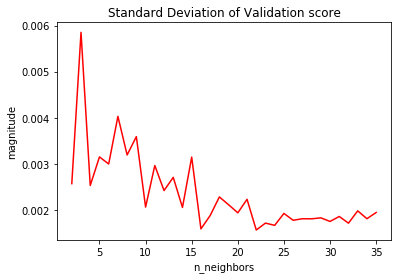

In [119]:
plt.plot(n_neighbors[1:35], std[1:35], color = 'red', label = 'Standard deviation' )
plt.xlabel('n_neighbors')
plt.ylabel('magnitude')
plt.title('Standard Deviation of Validation score')

### Trying the optimal model over test set

In [125]:
clf = KNN(n_neighbors = 10 )
clf.fit(train_x, train_y)

score1 = clf.score(train_x, train_y)

score = clf.score(test_x, test_y)
score*100, score1*100

(81.60935738444194, 82.3170158789815)

In [121]:
pred1=clf.predict(test_x)
pred1[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [123]:
from sklearn.metrics import f1_score, auc

f1_score(test_y,pred1)

0.0711743772241993

# Logistic Regression


In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, auc
from sklearn.metrics import roc_auc_score


In [127]:
logreg = LogisticRegression()


In [128]:
predicted = cross_val_score( logreg , X = train_x, y = train_y, cv = 10)
predicted

array([0.81971831, 0.82104274, 0.82151245, 0.82339126, 0.82010333,
       0.82048872, 0.81531955, 0.82424812, 0.81860902, 0.8218985 ])

In [129]:
predicted.mean()*100, predicted.std()*100

(82.06332008266753, 0.23809068927157645)

In [130]:
logreg.fit(train_x, train_y)

score1 = logreg.score(train_x, train_y)

score = logreg.score(test_x, test_y)
score*100, score1*100

(82.24351747463359, 82.11970309123367)

In [131]:
pred2=logreg.predict(test_x)
pred2[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# Decision Tree

In [132]:
from sklearn.tree import DecisionTreeClassifier

In [133]:
dtc=DecisionTreeClassifier(max_depth=6)

In [134]:
predicted_tree = cross_val_score( dtc , X = train_x, y = train_y, cv = 10)
predicted_tree

array([0.85962441, 0.84828558, 0.85345233, 0.85439173, 0.84499765,
       0.85526316, 0.84727444, 0.84257519, 0.85526316, 0.85385338])

In [135]:
predicted_tree.mean()*100, predicted_tree.std()*100

(85.14981026261232, 0.5120171551185503)

In [136]:
dtc.fit(train_x, train_y)

score1 = dtc.score(train_x, train_y)

score = dtc.score(test_x, test_y)
score*100, score1*100

(85.58342728297632, 86.50286573334586)

In [137]:
pred3=dtc.predict(test_x)
pred3[:10]

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

# Ensembling the 3 models, with max voting

In [151]:
from statistics import mode
final_pred = np.array([])
for i in range(0,len(test_x)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))

In [139]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [140]:
accuracy_score(test_y, final_pred)

0.8221533258173619

In [141]:
accuracy_score(test_y, pred1), accuracy_score(test_y, pred2), accuracy_score(test_y, pred3)

(0.8160935738444194, 0.822435174746336, 0.8558342728297632)

In [142]:
f1_score(test_y, pred1), f1_score(test_y, pred2), f1_score(test_y, pred3)

(0.0711743772241993, 0.1038406827880512, 0.5208430913348946)

In [143]:
f1_score(test_y, final_pred)

0.09469153515064563

In [144]:
roc_auc_score(test_y,final_pred)

0.5239706840883634

In [145]:
roc_auc_score(test_y, pred1), roc_auc_score(test_y, pred2), roc_auc_score(test_y, pred3)

(0.5155517977799308, 0.5261998299135164, 0.6885734242829039)

In [146]:
from sklearn.metrics import classification_report
print(classification_report(test_y, final_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      5781
           1       0.84      0.05      0.09      1315

    accuracy                           0.82      7096
   macro avg       0.83      0.52      0.50      7096
weighted avg       0.82      0.82      0.75      7096

